# Name : Dhruvil Shah
# Red-id : 823968360
# Project Title : Income Classification

# Project Description : 

## Goal of this project:
### Income classification dataset is about finding wether a person makes over 50K per year or not. Data contains different features such as Age, Workclass, Education, Occupation, Relationship, Race, Sex, Hours-per-week, Native-country and output feature is income. I will first do Analysis, I will create a dashboard for visualization and at the end, I will use Random Forest Classification using Python and SparkML. 

### I have taken a dataset from Kaggle.com. The link : https://www.kaggle.com/lodetomasi1995/income-classification

# Introduction
## The project is divided into five parts :
## 1) Data Cleaning
## 2) Data Analysis
## 3) Dashboard for visualization
## 4) Machine Learning
## 5) Conclusion

# Part-1 Data Cleaning

### pip commands

### 1) sklearn for machine learning model using python
### 2) category_encoders is for converting category values into binary
### 3) pyspark for Machine learning using spark ( Need java 8)
### 4) tkinter for visualization dashboard
### 5) numpy for data cleaning and analysis
### 6) pandas for data cleaning and analysis
### 7) matplotlib for visualization
### 8) seaborn for visualization
### 9) warning for removing unwanted warnings

In [1]:
!pip install sklearn  
!pip install category_encoders
!pip install pyspark ## please install through anaconda prompt using "conda install -c conda-forge pyspark"
!pip install tkinter
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install warnings

ERROR: Invalid requirement: '##'
ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


## Import Libraries
### We will include all libraries at here so it is easy to install if anything not found.

In [2]:
import numpy as np
from tkinter import *
from tkinter import messagebox
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.feature_selection import SelectKBest, chi2
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer,OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

### Loading Dataset

In [3]:
file_path = 'income_evaluation.csv'
income_dataset = pd.read_csv(file_path)

### Let's look at dataset to understand columns and values

In [4]:
income_dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Let's look at columns

In [5]:
income_dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### Dataset's all columns have space before their name except age. So we will add space to age columns as well to make columns with same format. We will remove columns fnlwgt, education-num, capital-gain and capital-loss.

In [6]:
income_dataset = income_dataset[["age"," workclass"," education"," marital-status"," occupation"," relationship"," race"," sex"," hours-per-week"," native-country"," income"]]
income_dataset = income_dataset.rename( columns = {'age': ' age'})
column_names = income_dataset.columns
column_names

Index([' age', ' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### Summary of dataset

In [7]:
income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 age               32561 non-null int64
 workclass         32561 non-null object
 education         32561 non-null object
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


#### We can see that age and hours-per-week are numeric variables and others are character variables. Output variable income is also character variable and there is no missing value in the dataset.

### Describe generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [8]:
income_dataset.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


### Printing unique values in each columns to find any non-value present as some character.

In [9]:
for each_col in income_dataset[list(income_dataset.columns)]:
    print(each_col + ":")
    print(income_dataset[each_col].unique())
    print()

 age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 marital-status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

 relationship:
['

### Many columns have ' ?' instead of null values. Let's find all and replace that with null variable and then find sum of all null values.

In [10]:
income_dataset.replace(' ?', np.nan, inplace= True)
income_dataset.isna().sum()

 age                  0
 workclass         1836
 education            0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

### We can see that workclass, occupation and native_country has null values. They all are character variables so we will replace null with previous value.

In [11]:
income_dataset.fillna(method = 'bfill', inplace=True)
income_dataset.isna().sum()

 age               0
 workclass         0
 education         0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

# Part-2 Data Analysis

### The dataset is categorical so most of my plotting is in bar plot for better visualization.

### 1: How is age distributed in dataset? 

In [12]:
age_distribution = income_dataset[' age'].value_counts().reset_index()
age_distribution = age_distribution.rename( columns = {'index':'Age',' age': 'Count'}).sort_values('Age')
age_distribution

,Age,Count
38,17,395
32,18,550
27,19,712
22,20,753
26,21,720
...,...,...
69,85,3
72,86,1
71,87,1
70,88,3


### Plotting graph for age distribution

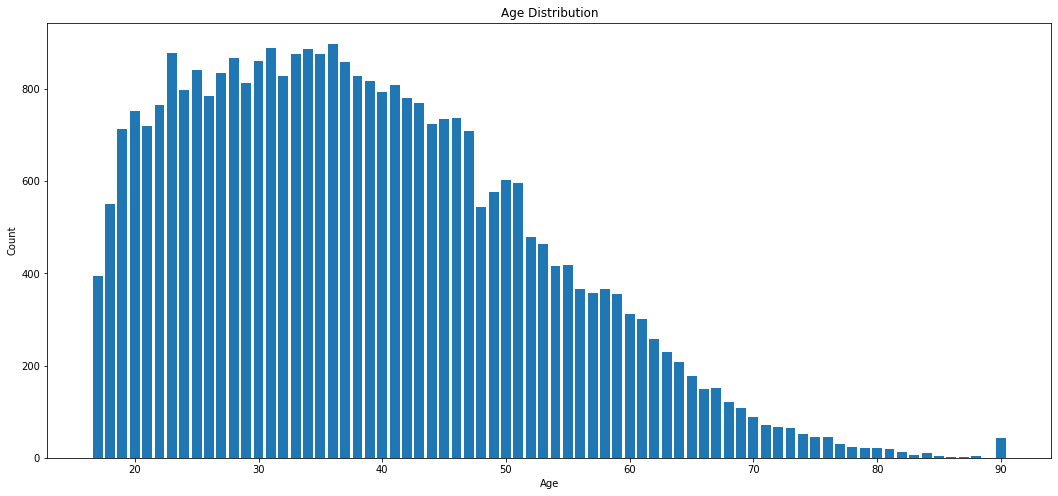

In [13]:
plt.figure(figsize=(18,8))
plt.bar(age_distribution['Age'],age_distribution['Count'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

###### Age is distributed from 17 to 90. Most of the people are with age from range of 25 to 40.

### 2: How is income distributed, what percentage is above 50K and below 50K?  

#### we will take income column, find its count using value_counts(), plot pie chart for percentage wise and bar char for total counts

In [14]:
income_dist = income_dataset[' income'].value_counts().reset_index()
income_dist = income_dist.rename(columns = {'index':'Income',' income': 'Total'})
income_dist

,Income,Total
0,<=50K,24720
1,>50K,7841


In [15]:
income_dist_percen = income_dist
income_dist_percen["Percentage"] = ((income_dist['Total']/ len(income_dataset)) * 100).round(2)
income_dist_percen

,Income,Total,Percentage
0,<=50K,24720,75.92
1,>50K,7841,24.08


###### We can see that 75% are earning less or equal to 50K and 25% are earing more than 50K.

### Plotting pie chart to see how much percentage is above 50K and below 50K.

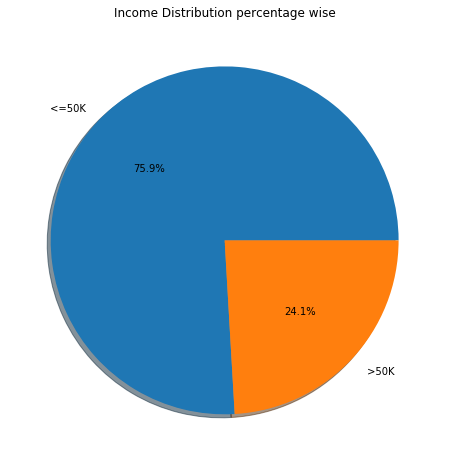

In [16]:
f,ax=plt.subplots(1,figsize=(10,8))
ax = plt.pie(income_dist['Total'], labels=list(income_dist['Income']),autopct='%1.1f%%', shadow=True)
plt.title('Income Distribution percentage wise')
plt.show()

### Plotting bar graph to find how many people earn over 50K and below 50K.

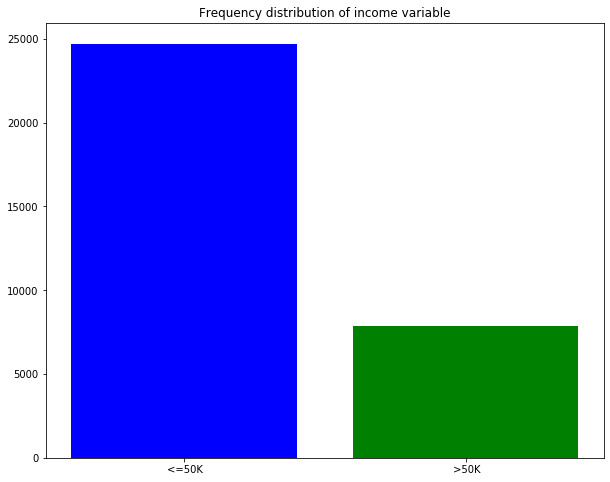

In [17]:
plt.figure(figsize=(10,8))
plt.bar(income_dist['Income'],income_dist['Total'], color=['blue','green'])
plt.title("Frequency distribution of income variable")    
plt.show()

### 3: How many males and females earns over 50K and below 50K. Also find percentage wise difference.

In [18]:
sex_dist_count = pd.crosstab(income_dataset[' sex'],income_dataset[' income'])
sex_dist_count

income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [19]:
sex_values = income_dataset[[' sex',' income']]
sex_values['percentage'] = income_dataset[' income']
sex_dist = sex_values.groupby([' sex',' income']).count()
sex_dist = sex_dist.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).round(2)
sex_dist

percentage
 sex     income            
 Female  <=50K        89.05
         >50K         10.95
 Male    <=50K        69.43
         >50K         30.57

###### There are 89% Female who earns less or equal to 50K a year and 10% earns more than 50K, while 69.5% Male are earning less or equal to 50K and 30.5% earns more than 50K. So number of males who earn more than 50K are more than female.

### Bar graph for total frequency of income with respect to sex.

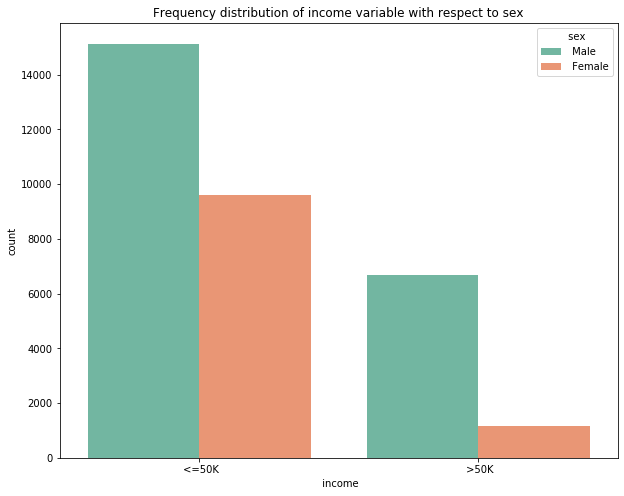

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x=" income", hue=" sex", data=income_dataset, palette="Set2")
ax.set_title("Frequency distribution of income variable with respect to sex")
plt.show()

### Percentage distribution of income with respect to sex

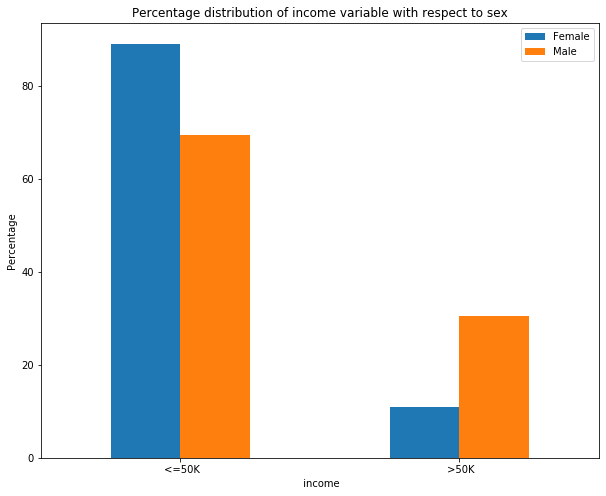

In [21]:
ax = sex_dist.unstack(' sex').plot.bar(figsize = (10,8))
plt.xticks(rotation = 0)
plt.legend(['Female','Male'],loc = 'upper right')
plt.ylabel("Percentage")
plt.title("Percentage distribution of income variable with respect to sex")
plt.show()

### 4. Find how many White and Black people works in private workclass makes over 50K and below 50K.

In [22]:
race_workclass = income_dataset[[' workclass',' race',' income']]
race_workclass['Count'] = race_workclass[' income']
race_workclass = race_workclass[race_workclass[' workclass'] == ' Private'][race_workclass[' race'].str.contains(' White| Black')][[' race',' income','Count']]
race_workclass = race_workclass.groupby([' race',' income']).count()
race_workclass

Count
 race   income       
 Black  <=50K    2103
        >50K      233
 White  <=50K   15865
        >50K     4658

###### We can say that number of white people who earns more than 50K are greater than black people in private jobs.

### Plotting graph

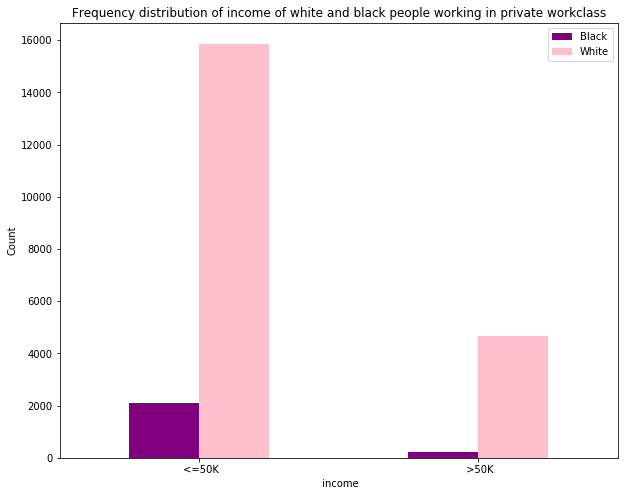

In [23]:
ax = race_workclass.unstack(' race').plot.bar(figsize = (10,8), color=['purple','pink'])
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.legend(['Black','White'],loc = 'upper right')
plt.title("Frequency distribution of income of white and black people working in private workclass")
plt.show()

### 5. Find how many people who has Doctorate education and works in Federal Government make over 50K or not.

In [24]:
doc_fed_income = income_dataset[[' education',' workclass',' income']]
doc_fed_income['Count'] = doc_fed_income[' income']
doc_fed_income = doc_fed_income[doc_fed_income[' education'] == ' Doctorate'][doc_fed_income[' workclass'] == ' Federal-gov']
doc_fed_income = doc_fed_income.groupby([' workclass',' education',' income']).count()
doc_fed_income

Count
 workclass    education  income       
 Federal-gov  Doctorate  <=50K       1
                         >50K       15

###### From above we can say that people with doctorate are choosing federal government jobs.
### Plotting graph for income distribution for doctorate who works for federal government.

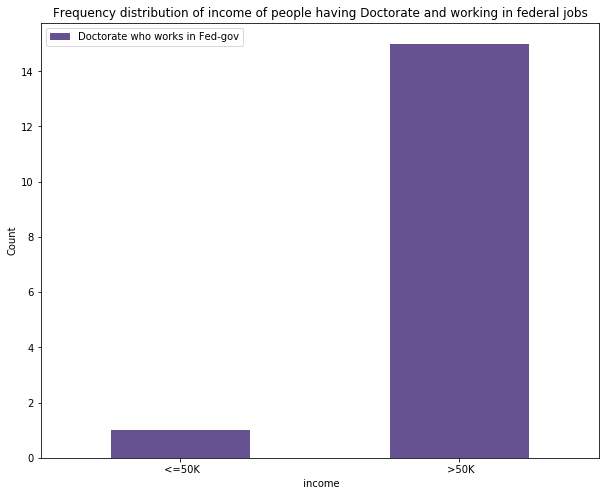

In [25]:
ax = doc_fed_income.unstack([' workclass',' education']).plot.bar(figsize = (10,8), color = ['#665191'])
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.legend(['Doctorate who works in Fed-gov'])
plt.title("Frequency distribution of income of people having Doctorate and working in federal jobs")
plt.show()

### 6. Find how many average hours per week people works based on their race and sex

In [26]:
hours = income_dataset[[' race',' sex',' hours-per-week']]
hours = hours.groupby([' race',' sex']).mean()
hours

hours-per-week
 race                sex                    
 Amer-Indian-Eskimo  Female        36.579832
                     Male          42.197917
 Asian-Pac-Islander  Female        37.439306
                     Male          41.468975
 Black               Female        36.834084
                     Male          39.997451
 Other               Female        35.926606
                     Male          41.851852
 White               Female        36.296691
                     Male          42.668822

###### We can say that White and Amer-Indian-Eskimo males are working more than others, while Asian-Pac-Islander females are working more than others.

### Plotting graph to find average hours per week based on their race.

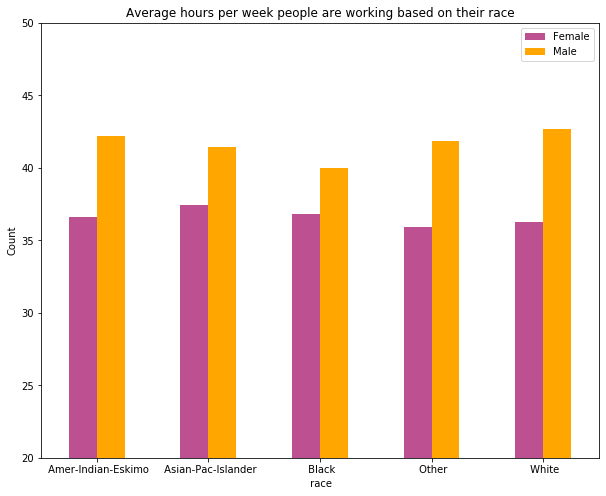

In [27]:
ax = hours.unstack().plot.bar(figsize = (10,8), color = ['#bc5090','#ffa600'])
plt.xticks(rotation = 0)
plt.ylabel("Count")
axes = plt.gca()
axes.set_ylim([20,50])
plt.title("Average hours per week people are working based on their race")
plt.legend(['Female','Male'],loc = 'upper right')
plt.show()

### 7. How many young people ( age between 20 and 35 inclusive) who are from United States and works for the government (local,state,federal)?

In [28]:
young_us_gov = income_dataset[[' age',' workclass',' native-country',' income']]
young_us_gov = young_us_gov[young_us_gov[' native-country'] == ' United-States'][young_us_gov[' workclass'].str.contains(' State-gov| Federal-gov| Local-gov')]
young_us_gov = young_us_gov[(young_us_gov[' age'] >= 20) & (young_us_gov[' age'] <= 35)].reset_index(drop=True)
young_us_gov

,age,workclass,native-country,income
0,35,Federal-gov,United-States,<=50K
1,23,Local-gov,United-States,<=50K
2,30,Federal-gov,United-States,<=50K
3,22,State-gov,United-States,<=50K
4,31,Local-gov,United-States,<=50K
...,...,...,...,...
1373,31,State-gov,United-States,<=50K
1374,33,Local-gov,United-States,<=50K
1375,28,Federal-gov,United-States,<=50K
1376,35,Local-gov,United-States,<=50K


In [29]:
young_us_gov_age_count = young_us_gov[' age'].value_counts().reset_index().sort_values(by='index')
young_us_gov_age_count = young_us_gov_age_count.rename(columns = {'index':'Age',' age':'Count'})
young_us_gov_age_count

,Age,Count
14,20,57
15,21,49
13,22,62
12,23,76
10,24,79
9,25,79
11,26,78
6,27,90
8,28,88
5,29,93


###### we can say that young people who are from United States are also working for government. As age increases more people join government.

### Plotting line graph for peolpe who are from United State and  working for government.

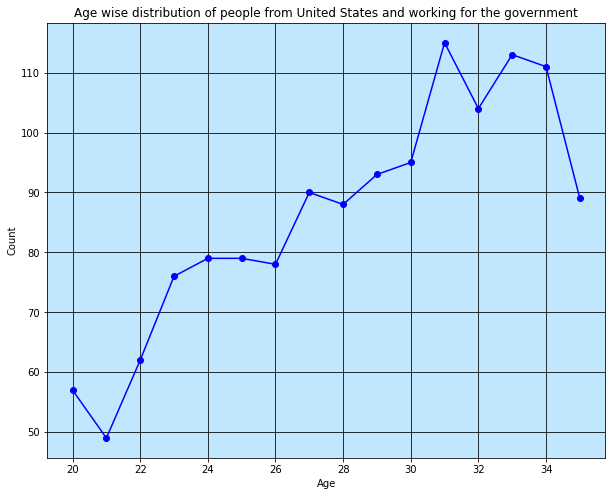

In [30]:
plt.figure(figsize = (10,8))
plt.plot(young_us_gov_age_count['Age'],young_us_gov_age_count['Count'], marker='o', color = 'blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age wise distribution of people from United States and working for the government")
ax = plt.gca()
ax.set_facecolor('#c1e7ff')
plt.grid(color='black')
plt.show()

### 8. How many people works in sales based on their sex.

In [31]:
sales_data = income_dataset[[' occupation',' sex']]
sales_data = sales_data[sales_data[' occupation'] == ' Sales']
sales_data = sales_data.groupby(' sex').count().reset_index()
sales_data = sales_data.rename( columns = {' occupation':'Count'})
sales_data

,sex,Count
0,Female,1371
1,Male,2496


### Plotting graph for people working in sales

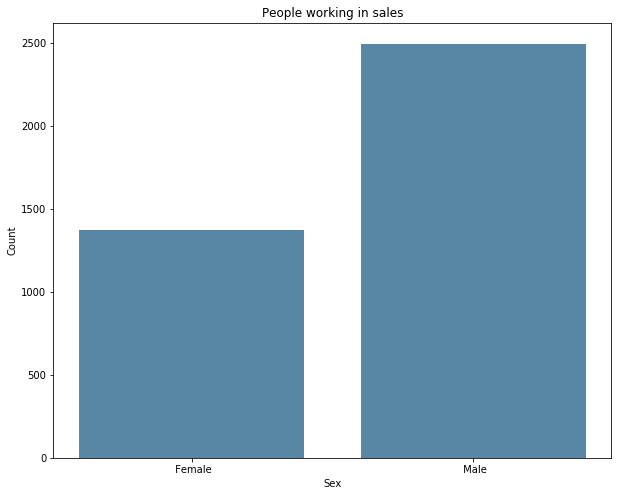

In [32]:
plt.figure(figsize=(10,8))
plt.bar(sales_data[' sex'],sales_data['Count'], color='#5886a5')
plt.title("People working in sales")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### 9. How many people over age of 60 makes greater than 50K money or not based their race.

In [33]:
old_age = income_dataset[[' age',' race',' income']]
old_age['Count'] = income_dataset[' income']
old_age = old_age[(old_age[' age'] > 60)][[' race',' income','Count']]
old_age = old_age.groupby([' race',' income']).count()
old_age

Count
 race                income       
 Amer-Indian-Eskimo  <=50K      11
                     >50K        1
 Asian-Pac-Islander  <=50K      42
                     >50K       15
 Black               <=50K     152
                     >50K       15
 Other               <=50K       5
 White               <=50K    1571
                     >50K      520

###### we can say that chances are higher that we earn less than 50K a year after age of 60.

### Plotting graph for income distribution of people over age 60 with respect to their race

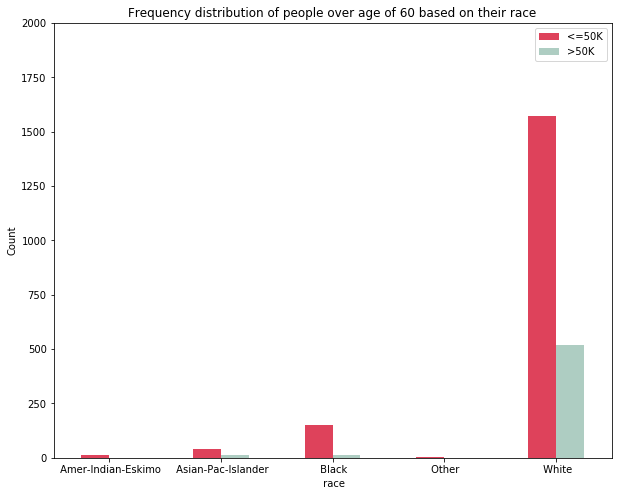

In [34]:
ax = old_age.unstack().plot.bar(figsize = (10,8), color = ['#de425b','#aecdc2'])
plt.xticks(rotation = 0)
plt.ylabel("Count")
axes = plt.gca()
axes.set_ylim([0,2000])
plt.title("Frequency distribution of people over age of 60 based on their race")
plt.legend(['<=50K',">50K"],loc = 'upper right')
plt.show()

### 10. Find the age distribution of people other than white race who earn more than 50K with respect to their race.

In [35]:
other_than_white = income_dataset[[' age',' race',' income']]
other_than_white = other_than_white[(other_than_white[' income'] == ' >50K') & (other_than_white[' race'] != ' White')][[' age',' race']].reset_index(drop=True)
other_than_white = pd.crosstab(other_than_white[' age'],other_than_white[' race'])
other_than_white

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other
age,,,,
21,1,0,1,0
22,1,0,2,0
23,0,2,0,0
24,0,3,1,0
25,0,1,4,0
26,0,4,3,0
27,2,6,6,1
28,1,1,6,0
29,1,5,7,1


### Plotting age distribution graph for people other than white earns more than 50K 

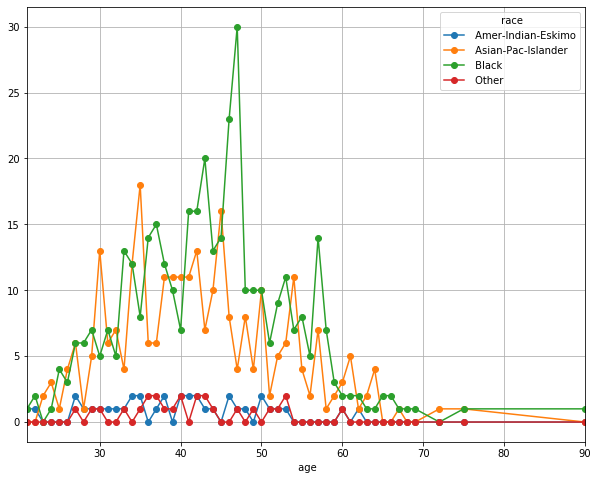

In [36]:
other_than_white.plot(kind = 'line', figsize=(10,8), marker='o')
plt.grid()
plt.show()

###### we can say that people other than white earns more than 50K between age of 30 to 45.

### 10. Find the age distribution of white people who earns over 50K. 

In [37]:
age_race = income_dataset[[' age',' race',' income']]
age_race = age_race[(age_race[' income'] == ' >50K') & (age_race[' race'] == ' White')].reset_index(drop=True)
age_race = age_race[' age'].value_counts().reset_index()
age_race = age_race.rename(columns = {'index':'Age',' age':'Count'}).sort_values(by = 'Age')
age_race 

,Age,Count
61,19,2
64,21,1
49,22,10
51,23,10
43,24,27
...,...,...
60,80,2
59,81,3
62,83,2
63,84,1


### Plotting graph for white people earning more than 50K

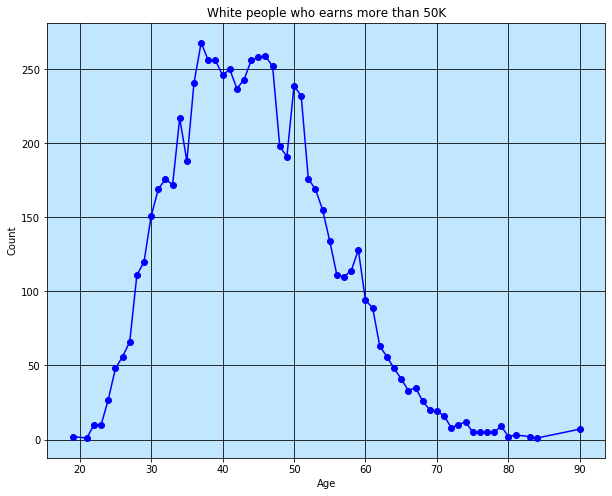

In [38]:
plt.figure(figsize=(10,8))
plt.plot(age_race['Age'],age_race['Count'], 'o-', color='blue')
ax = plt.gca()
ax.set_facecolor('#c1e7ff')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("White people who earns more than 50K")
plt.grid(color='black')
plt.show()

###### we can say that more white people earns greater than 50K between age of 30 to 55

### 11. Find distribution of age with respect to sex. 

In [39]:
age_sex = income_dataset[[' sex',' age']]
age_sex['Count'] = age_sex[' sex']
age_sex = age_sex.groupby([' age',' sex']).count().reset_index()
age_sex

,age,sex,Count
0,17,Female,186
1,17,Male,209
2,18,Female,268
3,18,Male,282
4,19,Female,356
...,...,...,...
139,87,Male,1
140,88,Female,1
141,88,Male,2
142,90,Female,14


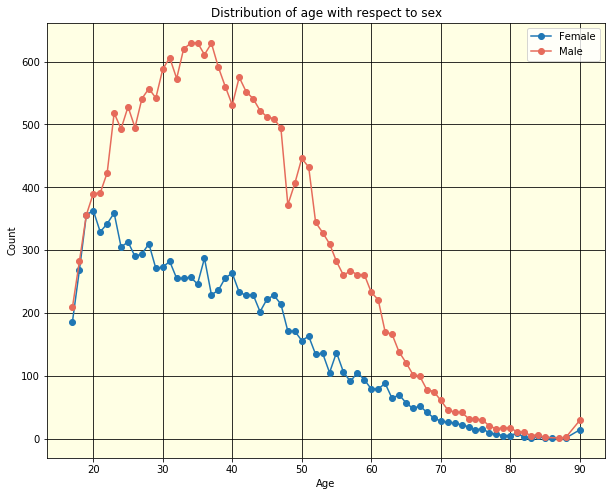

In [40]:
plt.figure(figsize=(10,8))
plt.plot(age_sex[age_sex[' sex'] == ' Female'][' age'],age_sex[age_sex[' sex'] == ' Female']['Count'],label = 'Female', marker = 'o')
plt.plot(age_sex[age_sex[' sex'] == ' Male'][' age'],age_sex[age_sex[' sex'] == ' Male']['Count'],color = '#e66b5b',label = 'Male',  marker = 'o')
plt.grid(color = 'black')
ax = plt.gca()
ax.set_facecolor('#ffffe4')
plt.legend(loc = 'upper right')
plt.title("Distribution of age with respect to sex")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Part-3 Dashboard

### This is a new try for me. I have created a dashboard for visualization. Here are some samples you can run for better visualization choices.

###### 1) Age( line graph button), clear button
###### 2) Workclass, sex (bar graph button), clear button
###### 3) Workclass, race, income (bar graph button), clear button
###### 4) Education, income (line graph)

### Line graph function is used for single column line graph while bar graph is used for single column bar graph

In [41]:
def linegraph(arg):
    fig, ax = plt.subplots(figsize = (16,6))
    chart_type = FigureCanvasTkAgg(fig, window)
    chart_type.get_tk_widget().grid(row = 15, column = 16,sticky = N+W)
    lines = income_dataset[arg].value_counts().reset_index()
    lines = lines.rename(columns = {'index':arg,arg: 'count'}).sort_values(by = arg).reset_index().drop(columns = 'index')
    plt.plot(lines[arg],lines['count'], 'bo-')
    plt.xticks(lines[arg].tolist(), rotation = 70)
    plt.title("Distribution of "+ arg)
    plt.xlabel(arg)
    plt.ylabel("Count")
    max_value = max(lines['count'])+2000
    axes = plt.gca()
    axes.set_ylim([0,max_value])
    plt.tight_layout()

def bargraph(arg):
    fig, ax = plt.subplots(figsize = (16,6))
    chart_type = FigureCanvasTkAgg(fig, window)
    chart_type.get_tk_widget().grid(row = 15, column = 16,sticky = N+W)
    bars = income_dataset[arg].value_counts().reset_index()
    bars = bars.rename(columns = {'index':arg,arg: 'count'}).sort_values(by = arg).reset_index().drop(columns = 'index')
    bar_width = 0.35
    rects1 = plt.bar(bars[arg], bars['count'], align='center', alpha=0.5)
    plt.xticks(bars[arg].tolist(), rotation = 70)
    for rect in rects1:
        height = rect.get_height()
        if (height != 0):
            ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                    '%d' % int(height) + "", ha='center', va='bottom')
    plt.title("Distribution of "+ arg)
    plt.xlabel(arg)
    plt.ylabel("Count")
    max_value = max(bars['count'])+2000
    axes = plt.gca()
    axes.set_ylim([0,max_value])
    plt.tight_layout()
    plt.show()

### linecrosstab is used for two column line graph while barcrosstab is used for two column bar graph.Mixedgraph is used for more than 2 column bar graph

In [42]:
def linecrosstab(arg1,arg2):
    mixed = pd.crosstab(income_dataset[arg1],income_dataset[arg2])
    figure = plt.figure(figsize = (16,6))
    chart_type = FigureCanvasTkAgg(figure, window)
    chart_type.get_tk_widget().grid(row = 15, column = 16,sticky = N+W)
    plt.plot(mixed.index,mixed, 'o')
    value = plt.plot(mixed.index,mixed, '-')
    names = list(set(income_dataset[arg2].tolist()))        
    plt.legend(value, names)
    plt.title("Frequency distribution of " + arg1 + " variable wrt " + arg2)
    plt.xlabel(arg1)
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    plt.tight_layout()
    

def barcrosstab(arg1,arg2):
    fig, ax = plt.subplots(figsize = (16,6))
    mixed = pd.crosstab(income_dataset[arg1],income_dataset[arg2])
    chart_type = FigureCanvasTkAgg(fig, window)
    chart_type.get_tk_widget().grid(row = 15, column = 16,sticky = N+W)
    stacked = mixed.stack().reset_index().rename(columns={0:'value'})
    react = sns.barplot(x=stacked[arg1], y=stacked.value, hue=stacked[arg2])
    bar_width = 0.35
    for rect in react.patches:
        height = rect.get_height()
        if (height != 0):
            ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                    '%d' % int(height) + "", ha='center', va='bottom')
    plt.title("Frequency distribution of " + arg1 + " variable wrt " + arg2)
    plt.xlabel(arg1)
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    max_value = max(stacked.value)+2000
    axes = plt.gca()
    axes.set_ylim([0,max_value])
    plt.tight_layout()
    
def mixedgraph(arg1,arg2,arg3,arg4,arg5):
    if arg1 == arg2 or arg1 == arg3 or arg2 == arg3:
        messagebox.showerror(title="Error", message="Please select different columns")
    else:    
        fig, ax = plt.subplots(figsize = (16,6))
        chart_type = FigureCanvasTkAgg(fig, window)
        chart_type.get_tk_widget().grid(row = 15, column = 16,sticky = N+W)
        mix = income_dataset[[arg1,arg2,arg3]]
        mix[" count"] = mix[arg3]
        y = mix.groupby([arg1,arg2,arg3]).count().reset_index()
        graph = y[y[arg1] == arg4]
        graph = graph[graph[arg2] == arg5]
        rects1 = plt.bar(graph[arg3],graph[' count'])
        plt.xticks(list(set(list(graph[arg3]))))
        plt.xlabel(arg3)
        plt.ylabel('Count')
        plt.title("Frequency distribution of " + arg3 + " variable wrt " + arg1 + " and " + arg2)
        for rect in rects1:
            height = rect.get_height()
            if (height != 0):
                ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                        '%d' % int(height) + "", ha='center', va='bottom')
        max_value = max(graph[' count'])+2000
        axes = plt.gca()
        axes.set_ylim([0,max_value])
        plt.show()


### lines checks for column values and based on that it calls line graph.graph checks for columns values and based on that it calls bar graph. col_3 checks for third column value and gives option to select values from column one and two.

In [43]:
def lines():
    if first_column.get() != "Select first column" and (second_column.get() == 'Select second column' or second_column.get() == " None"):
        linegraph(first_column.get())
    elif first_column.get() != "Select first column" and second_column.get() != " None" and second_column.get() != 'Select second column':
        linecrosstab(first_column.get(),second_column.get())
    elif first_column.get() == "Select first column" and (first_column.get() == "Select second column" or first_column.get() == " None"):
        messagebox.showerror(title="Error", message="Please select atleast one column")
        
def graph():
    if first_column.get() != "Select first column" and (second_column.get() == 'Select second column' or second_column.get() == " None"):
        bargraph(first_column.get())
    elif first_column.get() != "Select first column" and second_column.get() != " None" and second_column.get() != 'Select second column':
        if third_column.get() == 'Select third column' or third_column.get() == ' None':
            barcrosstab(first_column.get(),second_column.get())
        else:
            check_sets()
    elif first_column.get() == "Select first column" and (first_column.get() == "Select second column" or first_column.get() == " None"):
        messagebox.showerror(title="Error", message="Please select atleast one column")
    
def col_3(third_col):
    if (third_col != "Select third column" and third_col != " None") and second_column.get() != " None":
        set_column_one_drop_down = OptionMenu(window, set_column_one, *list(set(list(income_dataset[first_column.get()]))))
        set_column_two_drop_down = OptionMenu(window, set_column_two, *list(set(list(income_dataset[second_column.get()]))))
        set_column_one_drop_down.grid(row=13,column=10)
        set_column_two_drop_down.grid(row=14,column=10)
        set_column_one_drop_down.config(width=20, state = 'normal')
        set_column_two_drop_down.config(width=20, state = 'normal')
        line_graph.config(state='disabled')
    else:
        line_graph.config(state='normal')
        set_column_one_drop_down = OptionMenu(window, set_column_one, '')
        set_column_two_drop_down = OptionMenu(window, set_column_two, '')
        set_column_one_drop_down.grid(row=13,column=10)
        set_column_two_drop_down.grid(row=14,column=10)
        set_column_one_drop_down.config(width=20, state = 'disabled')
        set_column_two_drop_down.config(width=20, state = 'disabled')
    

### col_1 and col_2 checks for column1 and column2 values, check_sets() calls three column graph and clear button clean the screen.

In [44]:
def col_1(open_col_2):
    if open_col_2 != 'Select first column':
        second_column_drop_down.config(state="normal")
    if third_column.get() != "Select third column" and third_column.get() != " None":
        col_3(third_column.get())
        
def col_2(open_col_3):
    if open_col_3 != 'Select second column' and open_col_3 != " None":
        third_column_drop_down.config(state="normal")
    if open_col_3 == " None":
        second_column_drop_down.config(state='disabled')
        third_column_drop_down.config(state='disabled')
        third_column.set("Select third column")
        col_3(third_column.get())
        print(third_column.get())
    if third_column.get() != "Select third column" and third_column.get() != " None":
        col_3(third_column.get())
        
def check_sets():
    if set_column_one.get() == "Select set one" or set_column_two.get() == 'Selct set two':
        messagebox.showerror(title="Error", message="Please select column values")
    else:
        mixedgraph(first_column.get(),second_column.get(),third_column.get(),set_column_one.get(),set_column_two.get())

def clear():
    line_graph.config(state='normal')
    second_column_drop_down.config(state='disabled')
    third_column_drop_down.config(state='disabled')
    first_column.set("Select first column")
    second_column.set("Select second column")
    third_column.set("Select third column")
    set_column_one_drop_down = OptionMenu(window, set_column_one,"")
    set_column_one_drop_down.grid(row=13,column=10)
    set_column_one_drop_down.config(width=20, state = 'disabled')
    set_column_one.set("Select set one")
    set_column_two_drop_down = OptionMenu(window, set_column_two, "")
    set_column_two_drop_down.grid(row=14,column=10)
    set_column_two_drop_down.config(width=20, state = 'disabled')
    set_column_two.set("Select set two")
    figure = plt.figure(figsize = (16,6))
    chart_type = FigureCanvasTkAgg(figure, window)
    chart_type.get_tk_widget().grid(row = 15, column = 16)

### This is the main part of dashboard. It creates window gives layout and calls function for interation

In [45]:
window = Tk()

window.title("Income Classification")

window.geometry('1500x700')

first_column = StringVar(window)
first_column.set("Select first column")
first_column_drop_down = OptionMenu(window, first_column, *column_names, command = col_1)
first_column_drop_down.grid(row=10,column=10,padx=10)
first_column_drop_down.config(width=20)

second_column = StringVar(window)
second_column.set("Select second column")
second_column_drop_down = OptionMenu(window, second_column, *column_names," None", command = col_2)
second_column_drop_down.grid(row=11,column=10,padx=10)
second_column_drop_down.config(width=20, state = 'disabled')

third_column = StringVar(window)
third_column.set("Select third column")
third_column_drop_down = OptionMenu(window, third_column, *column_names," None", command = col_3)
third_column_drop_down.grid(row=12,column=10)
third_column_drop_down.config(width=20,state = 'disabled')

line_graph = Button(window, text="Line-Graph", command=lines)
line_graph.grid(row=10,column=15,sticky = N+W)

bar_graph = Button(window, text="Bar-Graph", command=graph)
bar_graph.grid(row=10,column=16, padx=(0,0),sticky = N+W)

clear = Button(window, text='Clear', command=clear)
clear.grid(row=11,column=15, sticky = N+W)

set_column_one = StringVar(window)
set_column_one.set("Select set one")
set_column_one_drop_down = OptionMenu(window, set_column_one,"")
set_column_one_drop_down.grid(row=13,column=10)
set_column_one_drop_down.config(width=20, state = 'disabled')

set_column_two = StringVar(window)
set_column_two.set("Select set two")
set_column_two_drop_down = OptionMenu(window, set_column_two, "")
set_column_two_drop_down.grid(row=14,column=10)
set_column_two_drop_down.config(width=20, state = 'disabled')

chart_type = FigureCanvasTkAgg(plt.figure(figsize = (16,6)), window)
chart_type.get_tk_widget().grid(row = 15, column = 16,sticky = N+W)

mainloop()

<Figure size 1152x432 with 0 Axes>

# Part-4 Machine Learning

In [46]:
income_dataset

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Splitting dataset into training and testing. We will use 80% of data for train and 20% for testing.

In [47]:
features = income_dataset.drop([' income'], axis=1)
label = income_dataset[' income']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.20)

### We have categorial data. So we need to preprocess and convert them into numerical using encoders.There different types of encoders. We will use One-hot encoder. 

In [48]:
encoder = ce.OneHotEncoder(cols=[' workclass', ' education', ' marital-status', ' occupation', ' relationship', 
                                 ' race', ' sex', ' native-country'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

## Our output feature is also categorical. So we need to convert that as well.

In [49]:
y_test = y_test.astype('category').cat.codes
y_train = y_train.astype('category').cat.codes

### We need to check which features are more important to find salary. To do that we will use SelectKBest which gives a score for our training data.

In [50]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score')) 

                Specs        Score
0                 age  6951.924841
59     hours-per-week  5246.220440
25   marital-status_1  2810.727688
46     relationship_1  2516.904784
28   marital-status_4  1798.096628
47     relationship_2  1148.134932
34       occupation_3   924.198942
58              sex_2   816.595933
15        education_7   724.924411
49     relationship_4   705.185585
12        education_4   698.628996
32       occupation_1   669.304512
17        education_9   616.452579
33       occupation_2   586.933499
48     relationship_3   464.553419
6         workclass_6   454.391957
21       education_13   419.523581
57              sex_1   403.333573
50     relationship_5   381.331601
27   marital-status_3   356.200476


### Feature scalling. We will use minmaxscalar to normalize data.

In [51]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## For Random Forest,we will use 2 parameters. 
### n_estimator : it is used to specify how many trees we want to build before aggregating predictions. we will use 50.
### criterion : It can either be “gini” or “entropy”. “gini” uses the Gini impurity while “entropy” makes the split based on the information gain.


In [52]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
random_forest_classifier.fit(x_train, y_train)
y_pred_random_forest = random_forest_classifier.predict(x_test)
print('Model accuracy score with 50 decision-trees : {0:.4f}'. format(accuracy_score(y_test, y_pred_random_forest)))

Model accuracy score with 50 decision-trees : 0.8064


## We got 81% accuracy using random forest classifier in python.

# SPARK ML ( Random Forest Classification)

### It creates app name and starts session

In [53]:
spark = SparkSession.builder.appName("Predict Income").getOrCreate()

### We have to create schema for out dataset columns

In [54]:
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("fnlwgt", IntegerType(), True),
    StructField("education", StringType(), True),
    StructField("education-num", IntegerType(), True),
    StructField("marital-status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),
    StructField("capital-gain", IntegerType(), True),
    StructField("capital-loss", IntegerType(), True),
    StructField("hours-per-week", IntegerType(), True),
    StructField("native-country", StringType(), True),
    StructField("income", StringType(), True)
])

### Loading Dataset and removing null values

In [55]:
dataset = spark.read.csv(file_path, header = False,schema=schema)
dataset = dataset.na.drop()

### Removing fnlgwt,capital-loss,capital-gain and education number for better understanding.

In [56]:
dataset = dataset.select("age","workclass","education","marital-status","occupation","relationship","race","sex","hours-per-week","native-country","income")
cols = dataset.columns

### We first create a list of fields which are categorical so we need to convert them into binary. We will use one-hot encoder to convert that using StringIndexer. We also create stages for pipeline.

In [57]:
categoricalColumns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

### Same way we convert output label into binary.

In [58]:
label_stringIdx = StringIndexer(inputCol = 'income', outputCol = 'label')
stages += [label_stringIdx]

### Finally we add numerical features and we use the VectorAssembler to combine all the feature columns into a single vector column.

In [59]:
numericCols = ['age', 'hours-per-week']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

### We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [60]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dataset)
dataset = pipelineModel.transform(dataset)
selectedCols = ['label', 'features'] + cols
dataset = dataset.select(selectedCols)
dataset.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- education: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



### Finally let's look at dataset.We have label and feature columns.

In [61]:
pd.DataFrame(dataset.take(5), columns=dataset.columns).transpose()

,0,1,2,3,4
label,0,0,0,0,0
features,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


### We will use 80% training and 20% testing data randomly same as we did in python.

In [62]:
train, test = dataset.randomSplit([0.8, 0.2], seed = 23)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 25973
Test Dataset Count: 6588


### Random Forest model training

In [63]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=50)
rfModel = rf.fit(train)

### Prediction on test data.

In [64]:
predictions = rfModel.transform(test)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[30.0073348654417...|       0.0|[0.60014669730883...|
|  0.0|[30.0073348654417...|       0.0|[0.60014669730883...|
|  0.0|[26.9924192522626...|       0.0|[0.53984838504525...|
|  0.0|[30.0073348654417...|       0.0|[0.60014669730883...|
|  0.0|[31.2593316691123...|       0.0|[0.62518663338224...|
|  0.0|[31.2593316691123...|       0.0|[0.62518663338224...|
|  0.0|[39.2522226096273...|       0.0|[0.78504445219254...|
|  0.0|[32.1262829524455...|       0.0|[0.64252565904891...|
|  0.0|[32.4186394816822...|       0.0|[0.64837278963364...|
|  0.0|[34.5362598467896...|       0.0|[0.69072519693579...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



### Evaluating model using BinaryClassificationEvaluator.

In [65]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.862415029944746


### We got 86% of accuracy using random forest classifier using sparkml.

# Part-5 Conclusion

## So we first analyse our dataset,preprocessed data, did analysis and visualise different results, we created a dashboard using tkinter and see different visualization. Used machine learning algorithm to predict income based on different features using Python. We used Random Forest Classifier. We used sparkml and did preprocessing, created a pipepline, trained and tested our model and evaluate our model. We achieved 81% accuracy using python and 86% accuracy using sparkml with 50 number of trees.